# 1. Try the experiments above with different gates (CNOT, Controlled-S, Controlled-T†), what results do you expect? What results do you get?

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

**1. Phase Estimation on CNOT**

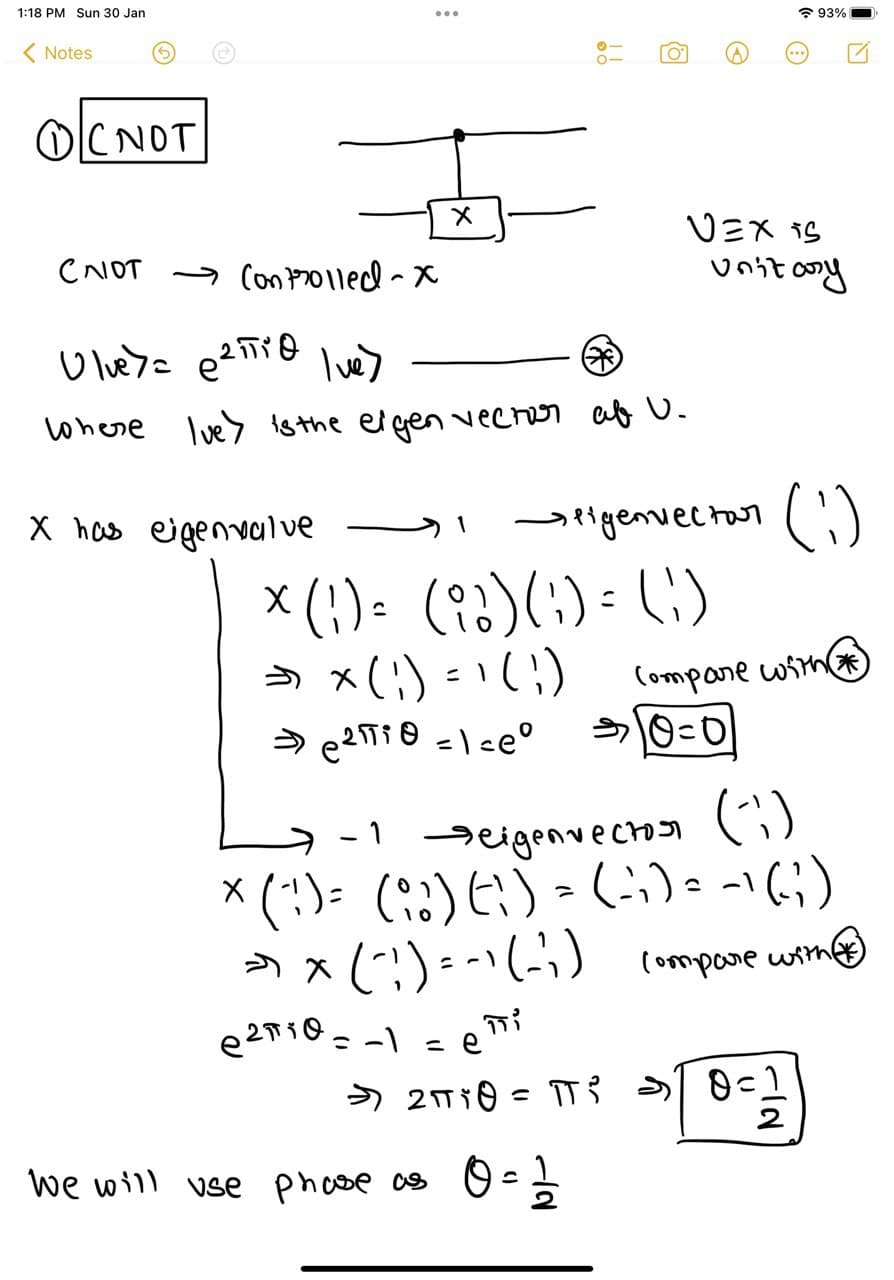

In [3]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/2
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                    ┌───┐          »
q_0: ┤ H ├─■────────────────────────────────────────────────X─┤ H ├─■────────»
     ├───┤ │                                                │ └───┘ │P(-π/2) »
q_1: ┤ H ├─┼──────■──────■──────────────────────────────────┼───────■────────»
     ├───┤ │      │      │                                  │                »
q_2: ┤ H ├─┼──────┼──────┼──────■──────■──────■──────■──────X────────────────»
     ├───┤ │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)                   »
q_3: ┤ X ├─■──────■──────■──────■──────■──────■──────■───────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                              ┌─┐           
«q_0: ──────■──────────────────┤M├───────────
«     ┌───┐ │                  └╥┘     ┌─┐   
«q_1: ┤ H ├─┼─────────■─────────╫──────┤M├───
«     └───┘ │P(-π/4)  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ──────■─────────■─────────╫─┤ H ├─╫─┤M├
«                               ║ └───┘ ║ └╥┘
«q_3: ──────────────────────────╫───────╫──╫─
«                               ║       ║  ║ 
«c: 3/══════════════════════════╩═══════╩══╩═
«                               0       1  2

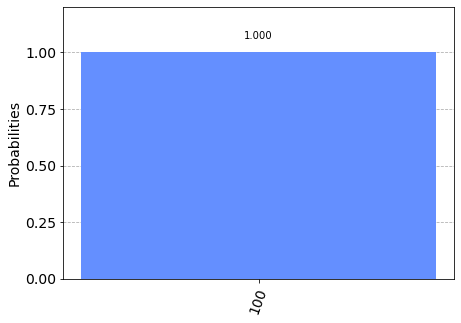

In [4]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

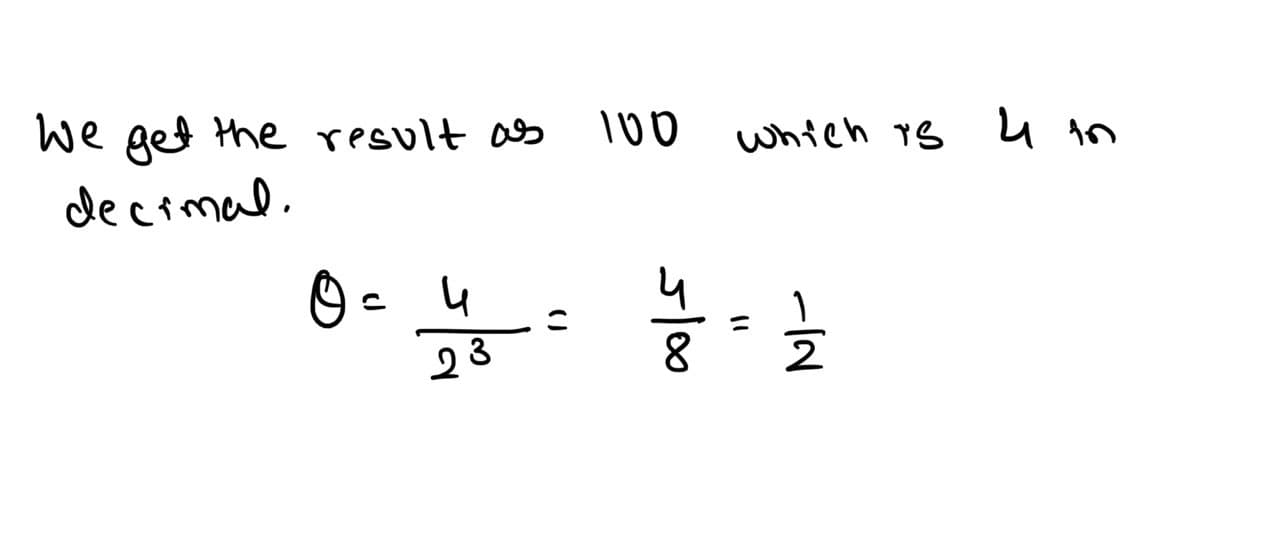

**2. Phase Estimation on Controlled-S**

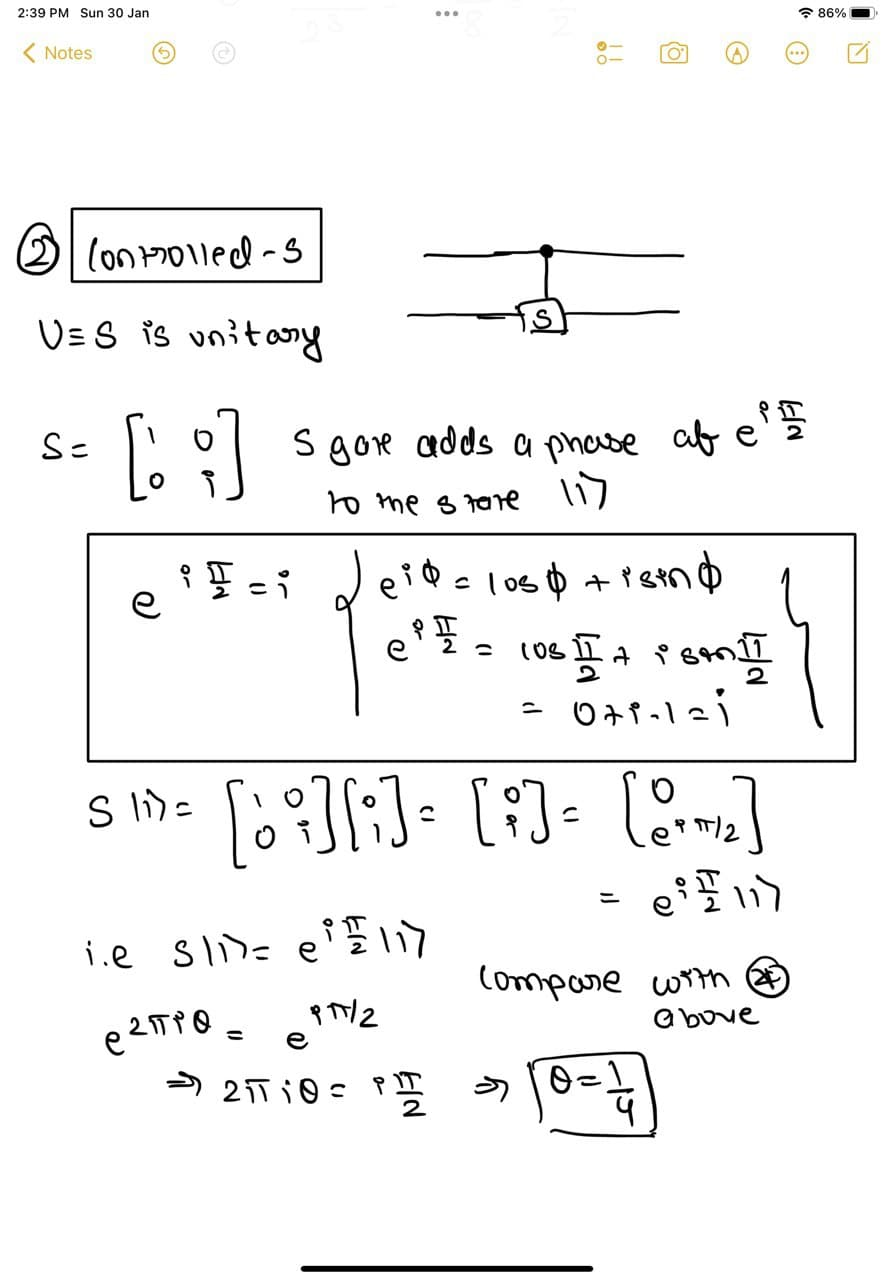

In [5]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/4
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                                  »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────X─»
     ├───┤ │                                                              │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────┼─»
     ├───┤ │        │        │                                            │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────X─»
     ├───┤ │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)    »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■──────────»
     └───┘                                                                  »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───┐                                   ┌─┐           
«q_0: ┤ H ├─■──────────────■──────────────────┤M├───────────
«     └───┘ │P(-π/2) ┌───┐ │                  └╥┘     ┌─┐   
«q_1: ──────■────────┤ H ├─┼─────────■─────────╫──────┤M├───
«                    └───┘ │P(-π/4)  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─────────────────────■─────────■─────────╫─┤ H ├─╫─┤M├
«                                              ║ └───┘ ║ └╥┘
«q_3: ─────────────────────────────────────────╫───────╫──╫─
«                                              ║       ║  ║ 
«c: 3/═════════════════════════════════════════╩═══════╩══╩═
«                                              0       1  2

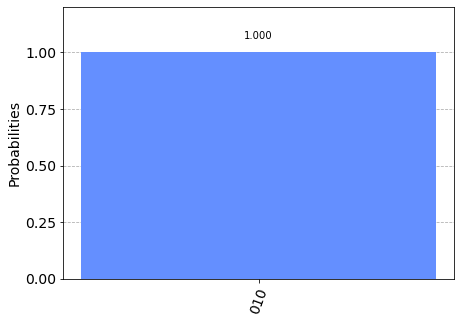

In [6]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

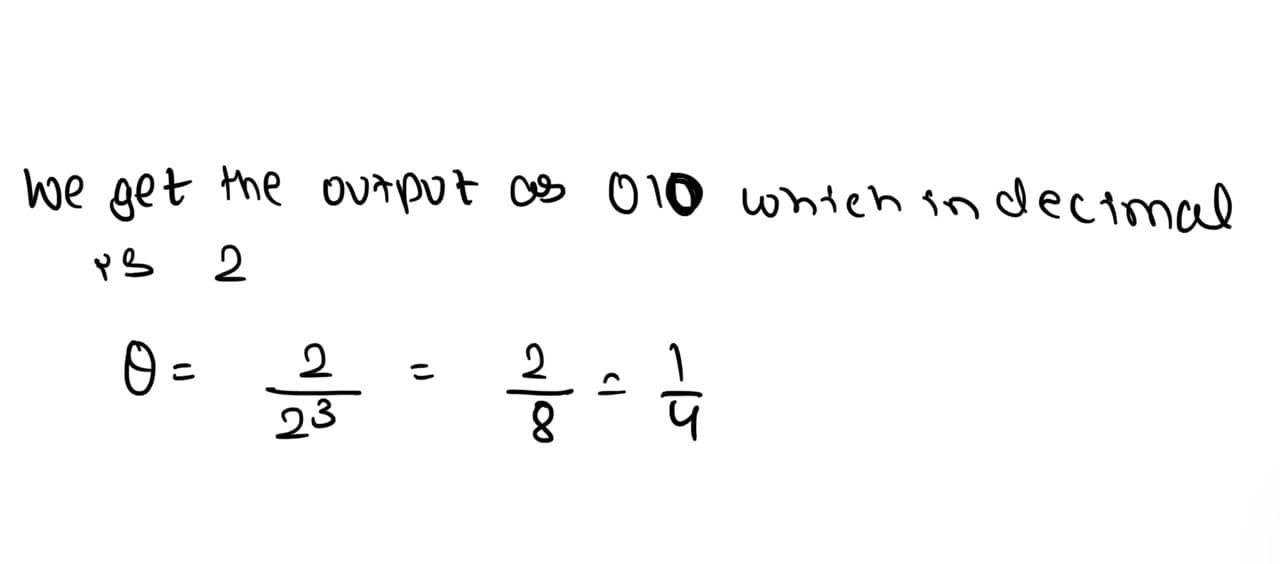

**3. Phase Estimation on Controlled-T+**

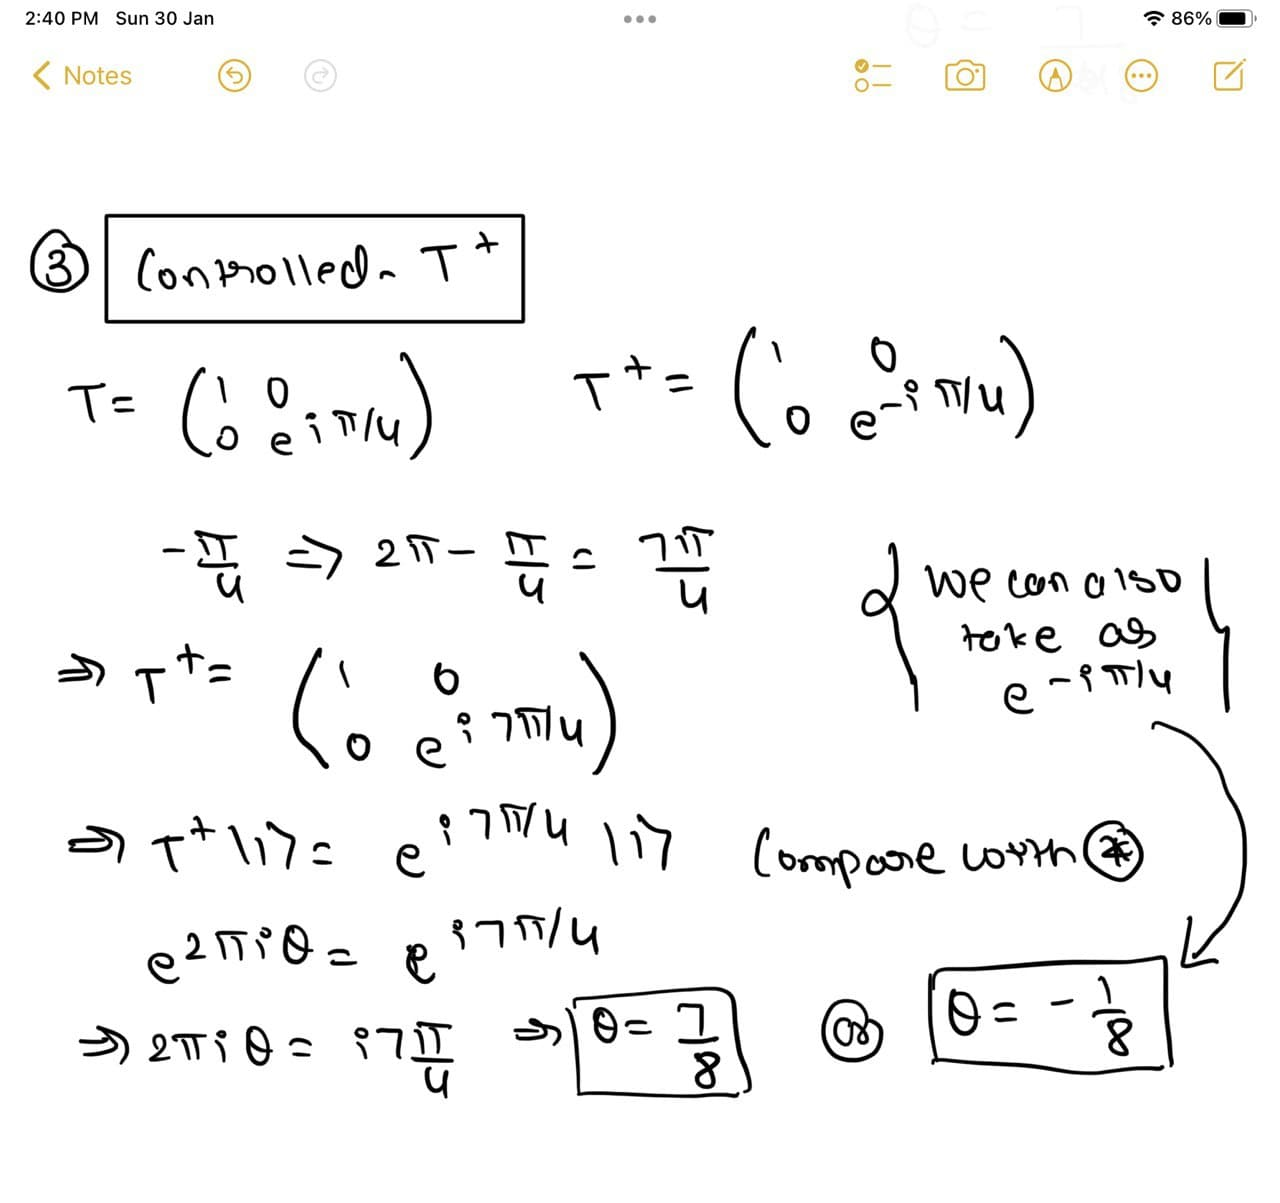

In [7]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 7*2*math.pi/8
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │P(7π/4)  │P(7π/4)  │P(7π/4)  │P(7π/4)  │P(7π/4)  │P(7π/4) »
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«                  ┌───┐                                   ┌─┐           
«q_0: ───────────X─┤ H ├─■──────────────■──────────────────┤M├───────────
«                │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘     ┌─┐   
«q_1: ───────────┼───────■────────┤ H ├─┼─────────■─────────╫──────┤M├───
«                │                └───┘ │P(-π/4)  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────X──────────────────────■─────────■─────────╫─┤ H ├─╫─┤M├
«      │P(7π/4)                                             ║ └───┘ ║ └╥┘
«q_3: ─■────────────────────────────────────────────────────╫───────╫──╫─
«                                                           ║       ║  ║ 
«c: 3/══════════════════════════════════════════════════════╩═══════╩══╩═
«                                                           0       1  2

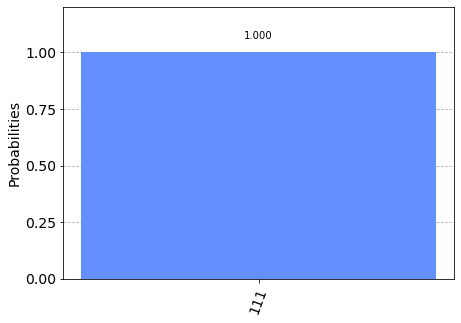

In [8]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

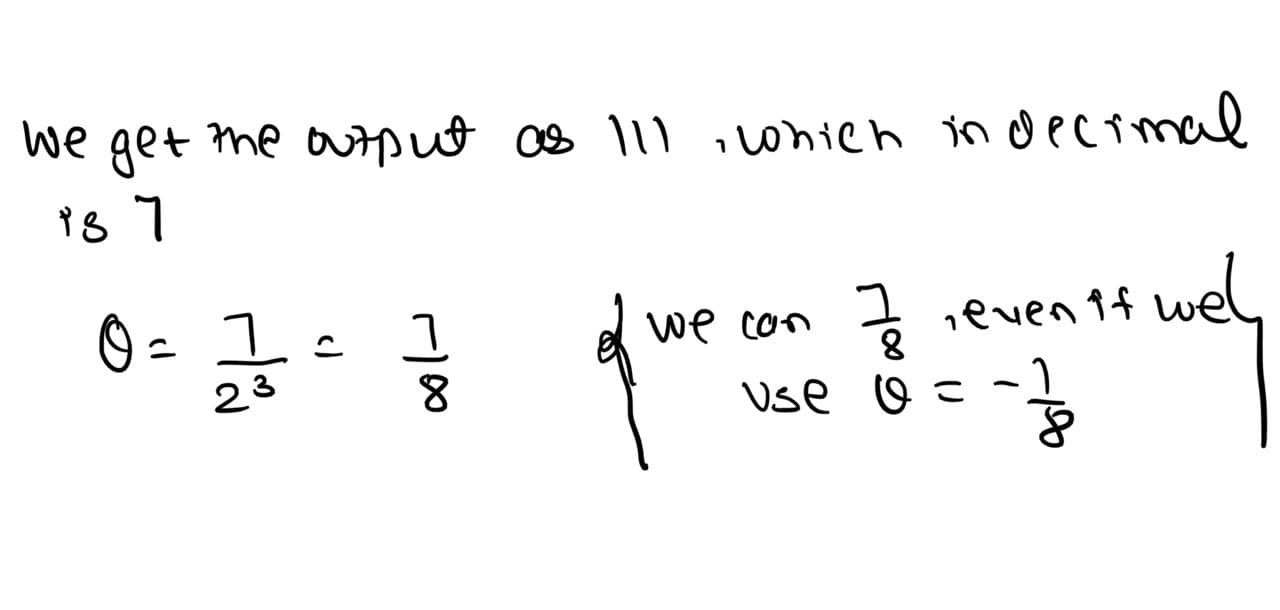

# 2. Try the experiment with a Controlled- Y-gate, do you get the result you expected?

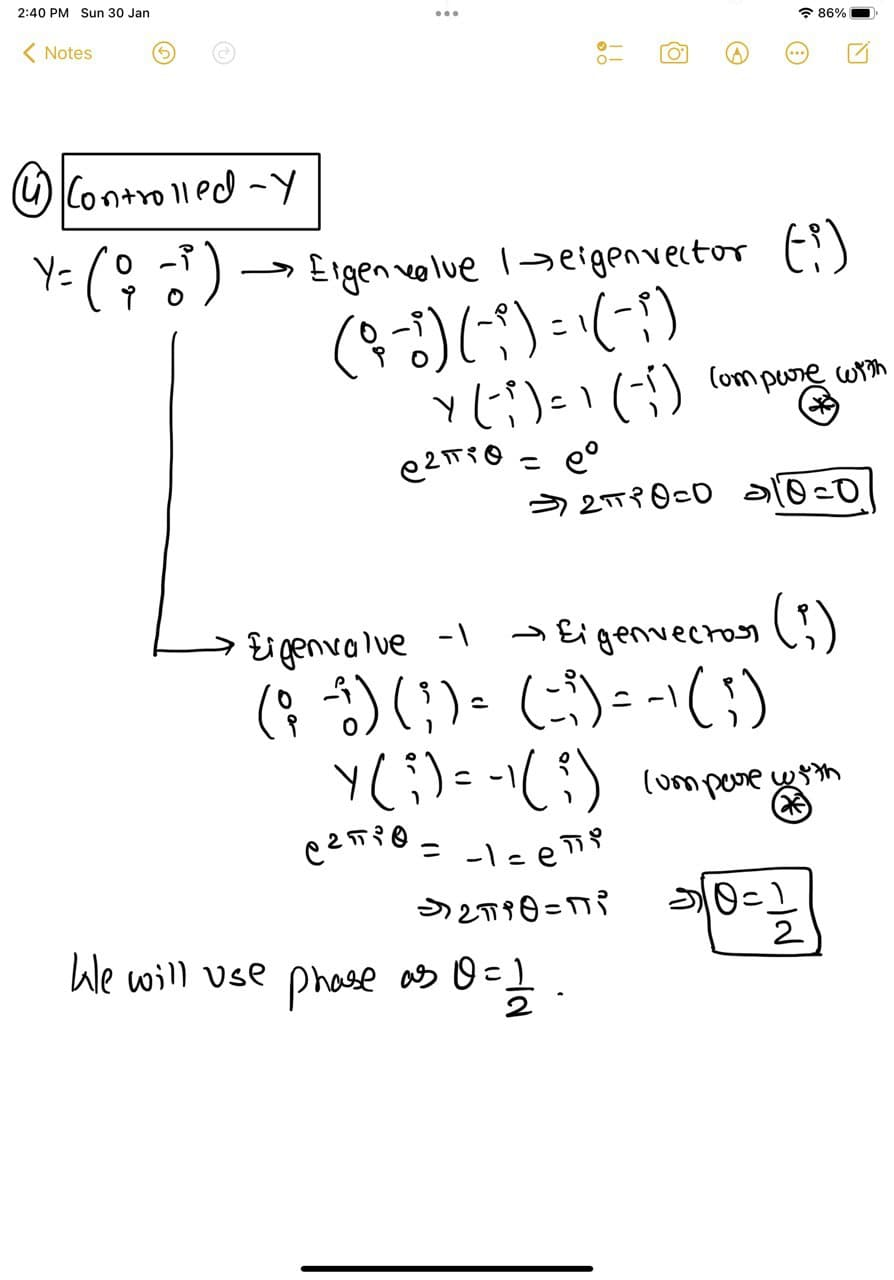

In [9]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/2
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                    ┌───┐          »
q_0: ┤ H ├─■────────────────────────────────────────────────X─┤ H ├─■────────»
     ├───┤ │                                                │ └───┘ │P(-π/2) »
q_1: ┤ H ├─┼──────■──────■──────────────────────────────────┼───────■────────»
     ├───┤ │      │      │                                  │                »
q_2: ┤ H ├─┼──────┼──────┼──────■──────■──────■──────■──────X────────────────»
     ├───┤ │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)                   »
q_3: ┤ X ├─■──────■──────■──────■──────■──────■──────■───────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                              ┌─┐           
«q_0: ──────■──────────────────┤M├───────────
«     ┌───┐ │                  └╥┘     ┌─┐   
«q_1: ┤ H ├─┼─────────■─────────╫──────┤M├───
«     └───┘ │P(-π/4)  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ──────■─────────■─────────╫─┤ H ├─╫─┤M├
«                               ║ └───┘ ║ └╥┘
«q_3: ──────────────────────────╫───────╫──╫─
«                               ║       ║  ║ 
«c: 3/══════════════════════════╩═══════╩══╩═
«                               0       1  2

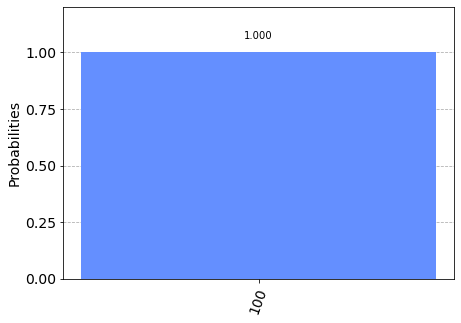

In [10]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

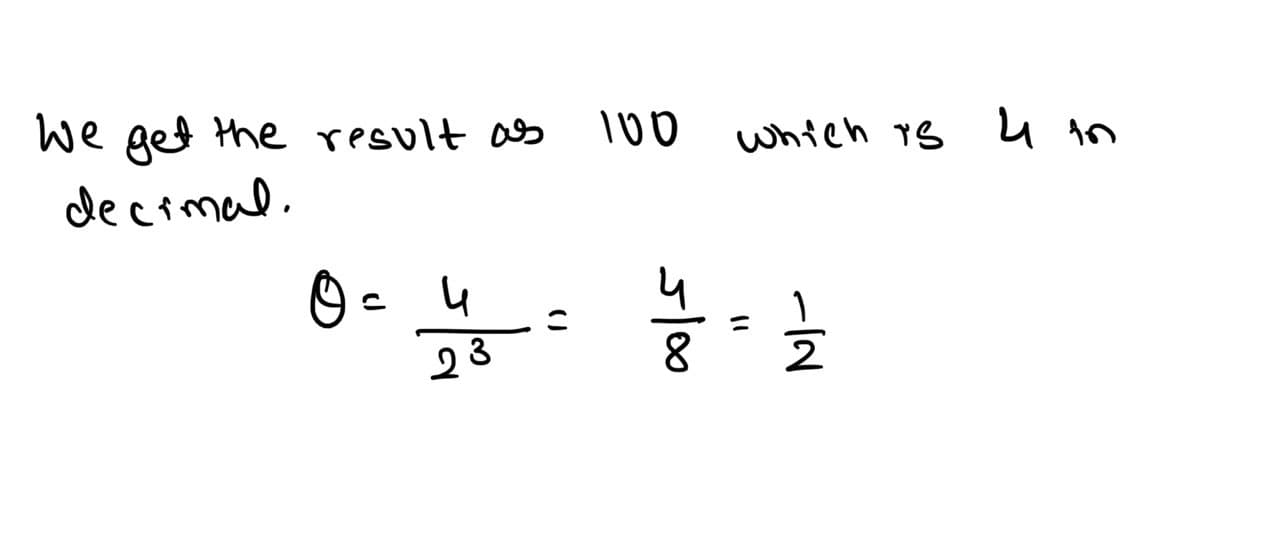